# NLP (NATURAL LANGUAGE PROCESSİNG)

## DATA PREPROCESSİNG

--------

In [1]:
import pandas as pd 
import seaborn as sbn 
import matplotlib.pyplot as plt
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [2]:
data = pd.read_csv("C:/ARTIFICIAL INTELLIGENCE/03 - Machine Learning/01 - Resource/preprocessed_data.csv")

In [3]:
data

,title,text,wikipedia_title,publication_date,first_published_in,classification,notes,normalized_date
0,A DESCENT INTO THE MAELSTRÖM,"The ways of God in Nature, as in Providence, a...",A Descent into the Maelström,May 1841,Graham's Magazine,Adventure,?,May 1841
1,A PREDICAMENT,"What chance, good lady, hath bereft you thus? ...",A Predicament,November 1838,Baltimore American Museum,Parody,"Companion to ""How to Write a Blackwood Article...",November 1838
2,A TALE OF JERUSALEM,Intensos rigidarn in frontern ascendere canos ...,A Tale of Jerusalem,"June 9, 1832",Philadelphia Saturday Courier,Humor,?,June 1832
3,A TALE OF THE RAGGED MOUNTAINS,"DURING the fall of the year 1827, while residi...",A Tale of the Ragged Mountains,April 1844,Godey's Lady's Book,"Adventure,Science_fiction",?,April 1844
4,BERENICE,"Dicebant mihi sodales, si sepulchrum amicae vi...",Berenice,March 1835,Southern Literary Messenger,Horror,?,March 1835
...,...,...,...,...,...,...,...,...
65,THE BALLOON-HOAX,"[Astounding News by Express, via Norfolk!—The ...",?,"April 13, 1844",?,"Fiction,Hoax",?,April 1844
66,THE MYSTERY OF MARIE ROGET,A SEQUEL TO “THE MURDERS IN THE RUE MORGUE.” ...,?,November 1842,?,Detective_fiction,?,November 1842
67,THE POETIC PRINCIPLE,"IN speaking of the Poetic Principle, I have no...",?,"August 17, 1849",?,Essay,?,August 1849
68,THE UNPARALLELED ADVENTURES OF ONE HANS PFAAL,"BY late accounts from Rotterdam, that city see...",?,June 1835,?,"Hoax,Science_fiction",?,June 1835


In [4]:
data.isnull().sum().sum()

0

<AxesSubplot:xlabel='classification', ylabel='count'>

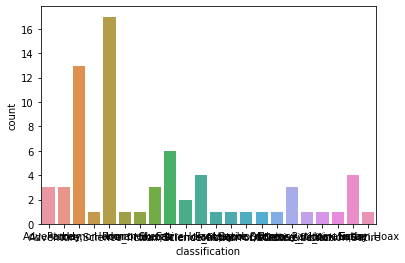

In [5]:
sbn.countplot(x="classification", data=data)

In [6]:
data = data[["text", "classification"]]

In [7]:
data

,text,classification
0,"The ways of God in Nature, as in Providence, a...",Adventure
1,"What chance, good lady, hath bereft you thus? ...",Parody
2,Intensos rigidarn in frontern ascendere canos ...,Humor
3,"DURING the fall of the year 1827, while residi...","Adventure,Science_fiction"
4,"Dicebant mihi sodales, si sepulchrum amicae vi...",Horror
...,...,...
65,"[Astounding News by Express, via Norfolk!—The ...","Fiction,Hoax"
66,A SEQUEL TO “THE MURDERS IN THE RUE MORGUE.” ...,Detective_fiction
67,"IN speaking of the Poetic Principle, I have no...",Essay
68,"BY late accounts from Rotterdam, that city see...","Hoax,Science_fiction"


In [8]:
data_1 = data[data.iloc[:, 1] == "Humor"]

In [9]:
data_2 = data[data.iloc[:, 1] == "Horror"]

In [10]:
data = pd.concat([data_1, data_2], axis=0)

<AxesSubplot:xlabel='classification', ylabel='count'>

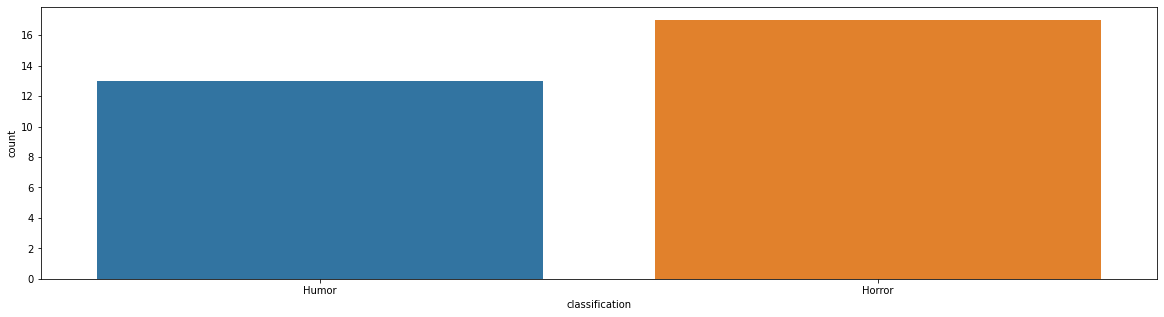

In [11]:
plt.figure(figsize=(20, 5))
sbn.countplot(x="classification", data=data)

In [12]:
data

,text,classification
2,Intensos rigidarn in frontern ascendere canos ...,Humor
7,Chacun a ses vertus. —Crebillon’s Xerxes. ANT...,Humor
14,"O Breathe not, etc. —Moore’s Melodies THE M...",Humor
20,"Slid, if these be your “passados” and “montant...",Humor
25,AN EXTRAVAGANZA. IT was a chilly November ...,Humor
28,Method is the soul of business.—OLD SAYING. ...,Humor
34,And stepped at once into a cooler clime.—Cowpe...,Humor
41,LATE EDITOR OF THE “GOOSETHERUMFOODLE.” By...,Humor
52,"MANY years ago, it was the fashion to ridicule...",Humor
54,"DURING the autumn of 18—, while on a tour thro...",Humor


In [13]:
ps = PorterStemmer()

In [14]:
indexs = [2, 7, 14, 20, 25, 28, 34, 41, 52, 54, 56, 58, 60, 4, 8, 12, 18, 22, 26, 27, 29, 36, 38, 42, 44, 47, 48, 50, 55, 61]

In [15]:
derlem = []

for i in indexs:

    comment_ = re.sub("[^a-zA-Z]", " ", data.iloc[:, 0][i])
    comment_ = comment_.lower()
    comment_ = comment_.split()
    comment_ = [ps.stem(word=word_) for word_ in comment_ if not word_ is set(stopwords.words("english"))]
    comment_ = " ".join(comment_)
    derlem.append(comment_)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
cv = CountVectorizer()

In [20]:
x = cv.fit_transform(derlem).toarray()

In [21]:
y = data[["classification"]].values

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
y = le.fit_transform(y)

C:\Users\90545\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
sc = StandardScaler()

In [29]:
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.fit_transform(x_test)

------------

## LOGISTIC REGRESSION

------

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_reg = LogisticRegression()

In [32]:
log_reg.fit(x_train_sc, y_train)

LogisticRegression()

In [33]:
log_reg.predict(x_test_sc)

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [34]:
y_pred = pd.DataFrame(data=log_reg.predict(x_test_sc))

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

In [37]:
cm

array([[6, 1],
       [0, 3]], dtype=int64)

In [38]:
ac = accuracy_score(y_true=y_test, y_pred=y_pred)

In [39]:
ac

0.9

----------